In [3]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from scipy import ndimage

%matplotlib inline

In [4]:
def show_forest(forest):
    cmap = colors.ListedColormap(["tan","green","red","black"])
    bounds = [0,1,2,3,4]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    img = plt.imshow(forest, cmap=cmap, norm=norm)
    plt.axis("off")
    plt.show()

In [5]:
N=10
g=0.9


forest = np.zeros((N,N),dtype=np.int)

nsteps = 100

f_list = [] 
f_list.append(np.copy(forest))

for i in range(nsteps):
    # pick a site
    site = np.random.randint(N,size=(2)) 
    # there is no tree
    if forest[site[0],site[1]] == 0:
        # grow one with probability g
        if np.random.random() < g:
            forest[site[0],site[1]] = 1
    
        f_list.append(np.copy(forest)) # append the forest whether or not a tree grew
    
    else: 
        # lightning strikes with probability 1-g
        if np.random.random() < 1-g:
            # lightning strikes -> burn site
            # s determines connectivity of burn 
            # (2,1) --> cross-shape / edge-connectivity
            # (2,2) --> box-shape / edge-corner-connectivity
            s = ndimage.generate_binary_structure(2,1)

            # origin of the fire
            burn = np.zeros((N,N), dtype=np.int)
            burn[site[0],site[1]]=1
            new_burn = burn

            old_forest = np.copy(forest) # save copy of forest

            while new_burn.any(): # while things are still burning

                forest = np.add(new_burn,forest) # burn the forest
                a = ndimage.binary_dilation(burn,s).astype(burn.dtype) # spread the burn

                burn2 = np.logical_and(old_forest,a)*1 # are there trees in the burn?

                new_burn = np.add(burn2,burn*-1) # did anything new burn?

                burn = burn2 # step complete
                
                f_list.append(np.copy(forest))
            
            mask = (forest == 2)*1
            
            f_list.append(np.add(mask,forest)) # burn becomes "burnt"
            forest = np.add(-2*mask,forest)
            f_list.append(np.copy(forest)) # burnt resets to empty

print("done")     

done


In [8]:
y = np.dstack(f_list)
print(y.shape)

(10, 10, 106)


In [85]:
array = f_list[20]
print(array)
mask = (array == 2)*1
print(mask)
np.add(mask,array)
np.add(-2*mask,array) 

[[2 2 1 0 0 0]
 [0 2 0 0 1 0]
 [1 0 0 1 0 1]
 [1 0 0 1 0 0]
 [0 1 0 2 0 1]
 [0 1 0 0 1 0]]
[[1 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0]])

In [64]:
site = np.array([0,3])
print(forest)
print(forest[site[0],site[1]])
old_forest = forest

[[ 9  9  8  8  9  0]
 [ 8  9  0  7  9  9]
 [ 8  7  9 11  1 10]
 [ 8  8  0 11 10 10]
 [ 8  8  6 11 10 10]
 [ 8  8  8  7 10  0]]
8


In [45]:
# s determines connectivity of burn 
# (2,1) --> cross-shape / edge-connectivity
# (2,2) --> box-shape / edge-corner-connectivity
s = ndimage.generate_binary_structure(2,1)

# origin of the fire
burn = np.zeros((N,N), dtype=np.int)
burn[site[0],site[1]]=1
new_burn = burn

old_forest = forest # save copy of forest

while new_burn.any(): # while things are still burning

    forest = np.add(new_burn,forest) # burn the forest
    a = ndimage.binary_dilation(burn,s).astype(burn.dtype) # spread the burn

    burn2 = np.logical_and(old_forest,a)*1 # are there trees in the burn?

    new_burn = np.add(burn2,burn*-1) # did anything new burn?

    burn = burn2 # step complete

[[0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [46]:
#forest = old_forest
while new_burn.any(): # while things are still burning

    forest = np.add(new_burn,forest) # burn the forest
    a = ndimage.binary_dilation(burn,s).astype(burn.dtype) # spread the burn

    burn2 = np.logical_and(old_forest,a)*1 # are there trees in the burn?

    new_burn = np.add(burn2,burn*-1) # did anything new burn?

    burn = burn2 # step complete
    
print("done")

done


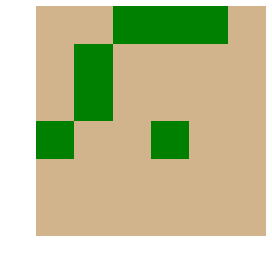

In [47]:
show_forest(old_forest)

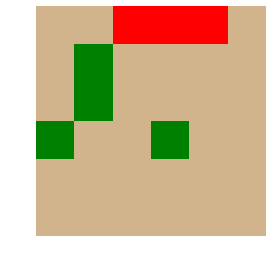

In [48]:
show_forest(forest)

In [56]:
ndimage.generate_binary_structure(2,1)

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

In [15]:
np.ones((N,N))[np.logical_and(forest,a2)]

array([1., 1., 1.])

In [16]:
np.logical_and(forest,a2)

array([[False, False, False, False, False, False],
       [False,  True, False, False, False, False],
       [False,  True, False, False, False, False],
       [False,  True, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [142]:
A = forest
print(A)

[[0 0 0 0 1 0]
 [0 1 0 0 1 0]
 [0 0 1 2 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]]


In [149]:
listy=[]
listy.append(A)
listy.append(old_forest)
print(listy)

[array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 1, 2, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]]), array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])]


In [150]:
y = np.dstack(listy)

In [151]:
y.shape

(6, 6, 2)